<a href="https://colab.research.google.com/github/nnagdalena/TextMining/blob/kolokwium/kolokwium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import re
import numpy as np
import nltk
from nltk import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [4]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [52]:
def text_prepering(x: str)-> str:
    x = re.sub('([;:]+[)(><-]+)', ' ', x)
    x = x.lower()
    x = re.sub(r'\d', ' ', x)
    x = re.sub('<[^>]+>', ' ', x)
    x = re.sub(r'[^\w\s]+', ' ', x)
    x = re.sub(r'\s{2,}', ' ', x)
    return x


def cleaning_words(tekst: list) -> list:
    stop_words = stopwords.words("english")
    lista: list = []
    for word in tekst:
        if word not in stop_words:
            lista.append(word)
    return lista


def stemming(wyrazenie: str) -> list:
    porter = PorterStemmer()
    list_tekst = wyrazenie.split(' ')
    return [porter.stem(word) for word in list_tekst]


def longer_words(lista: list) -> list:
    lista_nowa = []
    for word in lista:
        if len(word) > 3:
            lista_nowa.append(word)
    return lista_nowa


def bag_of_words(words: list) -> dict:
    bow = {}
    for word in words:
        if word not in bow.keys():
            bow[word] = 1
        else:
            bow[word] += 1
    return bow


def text_tokenizer(text) -> list:
    tekst = text_prepering(text)
    tekst = stemming(tekst)
    tekst = cleaning_words(tekst)
    tekst = longer_words(tekst)
    return tekst


def wordcloud(bow: list, title: str):
    bow = bag_of_words(bow)
    wc = WordCloud()
    wc.generate_from_frequencies(bow)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wc.to_file(f"{title}.png")


In [53]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/alexa_reviews.csv', usecols=['verified_reviews', 'rating'], sep=";", encoding='cp1252')

print(df.head())
print('\n')
print(df.info())
print('\n')
print(df.isnull().sum())

   rating                                   verified_reviews
0       5                                      Love my Echo!
1       5                                          Loved it!
2       4  Sometimes while playing a game, you can answer...
3       5  I have had a lot of fun with this thing. My 4 ...
4       5                                              Music


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3147 entries, 0 to 3146
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3147 non-null   int64 
 1   verified_reviews  3147 non-null   object
dtypes: int64(1), object(1)
memory usage: 49.3+ KB
None


rating              0
verified_reviews    0
dtype: int64


In [54]:
df = df.rename(columns={"verified_reviews": "text"})
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [55]:
print("Liczebność grup")
print('\n')
print(df.groupby(['rating']).size())

Liczebność grup


rating
1     130
2      78
3     108
4     338
5    1662
dtype: int64


In [56]:
df_final = " ".join(x for x in df.text)
df_final = text_tokenizer(df_final)

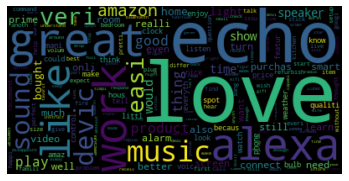

In [57]:
wordcloud(df_final,'wordcloud')

In [58]:
vectorizer_count = CountVectorizer(tokenizer=text_tokenizer)
count_transform = vectorizer_count.fit_transform(df['text'])

In [59]:
x_train, x_test, y_train, y_test = train_test_split(count_transform, df['rating'], test_size=0.25, random_state=13, stratify = df['rating'])

In [60]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), LinearSVC()]

for clf in classifiers:
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  print(f"{clf} Accuracy: {round(accuracy_score(y_test, y_pred), 2)}, recall: {round(recall_score(y_test, y_pred,average='micro'),2)}, precision: {round(precision_score(y_test, y_pred,average='micro'),2)}\n")
  print(classification_report(y_test, y_pred, labels=df["rating"].unique()))


DecisionTreeClassifier() Accuracy: 0.65, recall: 0.65, precision: 0.65

              precision    recall  f1-score   support

           5       0.79      0.83      0.81       415
           4       0.26      0.26      0.26        85
           3       0.09      0.07      0.08        27
           2       0.07      0.05      0.06        19
           1       0.24      0.18      0.21        33

    accuracy                           0.65       579
   macro avg       0.29      0.28      0.28       579
weighted avg       0.63      0.65      0.64       579

RandomForestClassifier() Accuracy: 0.74, recall: 0.74, precision: 0.74

              precision    recall  f1-score   support

           5       0.76      0.97      0.85       415
           4       0.44      0.13      0.20        85
           3       1.00      0.07      0.14        27
           2       1.00      0.05      0.10        19
           1       0.53      0.30      0.38        33

    accuracy                           0.